# Higher Level Computer Vision Team Projekt

Featuring Emil Schallwig and ...

## Setup

In [7]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
# Defining paths

TRAIN_DATA_DIR = os.path.join("train")
VAL_DATA_DIR = os.path.join("val")

apple_train_dir = os.path.join(TRAIN_DATA_DIR, "apple")
banana_train_dir = os.path.join(TRAIN_DATA_DIR, "banana")
orange_train_dir = os.path.join(TRAIN_DATA_DIR, "orange")
avocado_train_dir = os.path.join(TRAIN_DATA_DIR, "avocado")
cherry_train_dir = os.path.join(TRAIN_DATA_DIR, "cherry")
kiwi_train_dir = os.path.join(TRAIN_DATA_DIR, "kiwi")
mango_train_dir = os.path.join(TRAIN_DATA_DIR, "mango")
pinenapple_train_dir = os.path.join(TRAIN_DATA_DIR, "pinenapple")
strawberry_train_dir = os.path.join(TRAIN_DATA_DIR, "strawberries")
watermelon_train_dir = os.path.join(TRAIN_DATA_DIR, "watermelon")

apple_val_dir = os.path.join(VAL_DATA_DIR, "apple")
banana_val_dir = os.path.join(VAL_DATA_DIR, "banana")
orange_val_dir = os.path.join(VAL_DATA_DIR, "orange")
avocado_val_dir = os.path.join(VAL_DATA_DIR, "avocado")
cherry_val_dir = os.path.join(VAL_DATA_DIR, "cherry")
kiwi_val_dir = os.path.join(VAL_DATA_DIR, "kiwi")
mango_val_dir = os.path.join(VAL_DATA_DIR, "mango")
pinenapple_val_dir = os.path.join(VAL_DATA_DIR, "pinenapple")
strawberry_val_dir = os.path.join(VAL_DATA_DIR, "strawberries")
watermelon_val_dir = os.path.join(VAL_DATA_DIR, "watermelon")


In [9]:
# Go into apple train directory and list files
apple_train_fnames = os.listdir(apple_train_dir)
apple_train_fnames

['00044.jpeg',
 '00101.jpeg',
 '00228.jpeg',
 '00013.jpeg',
 '00156.jpeg',
 '00005.jpeg',
 '00140.jpeg',
 '00052.jpeg',
 '00117.jpeg',
 '00029.jpeg',
 '00183.jpeg',
 '00091.jpeg',
 '00212.jpeg',
 '00087.jpeg',
 '00068.jpeg',
 '00204.jpeg',
 '00195.jpeg',
 '00224.jpeg',
 '00048.jpeg',
 '00009.jpeg',
 '00160.jpeg',
 '00025.jpeg',
 '00137.jpeg',
 '00072.jpeg',
 '00208.jpeg',
 '00121.jpeg',
 '00064.jpeg',
 '00176.jpeg',
 '00033.jpeg',
 '00199.jpeg',
 '00177.jpeg',
 '00032.jpeg',
 '00198.jpeg',
 '00120.jpeg',
 '00065.jpeg',
 '00209.jpeg',
 '00136.jpeg',
 '00073.jpeg',
 '00161.jpeg',
 '00024.jpeg',
 '00008.jpeg',
 '00049.jpeg',
 '00225.jpeg',
 '00194.jpeg',
 '00205.jpeg',
 '00086.jpeg',
 '00069.jpeg',
 '00213.jpeg',
 '00090.jpeg',
 '00028.jpeg',
 '00182.jpeg',
 '00053.jpeg',
 '00116.jpeg',
 '00004.jpeg',
 '00141.jpeg',
 '00012.jpeg',
 '00157.jpeg',
 '00229.jpeg',
 '00045.jpeg',
 '00100.jpeg',
 '00222.jpeg',
 '00019.jpeg',
 '00058.jpeg',
 '00166.jpeg',
 '00189.jpeg',
 '00023.jpeg',
 '00218.jp

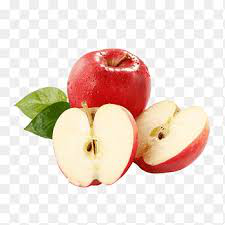

In [10]:
PIL.Image.open(os.path.join(apple_train_dir, apple_train_fnames[0]))

## Lets load the data uising keras utility

### Cleaning dataset based on size

(225, 225)
(259, 194)
(253, 199)
(239, 211)
(262, 192)
(225, 225)
(225, 225)
(279, 181)
(225, 225)
(271, 186)
(278, 181)
(300, 168)
(225, 225)
(225, 225)
(290, 174)
(275, 183)
(238, 212)
(225, 225)
(284, 177)
(221, 229)
(225, 225)
(225, 225)
(297, 170)
(280, 180)
(281, 180)
(201, 251)
(290, 174)
(260, 194)
(285, 177)
(241, 209)
(225, 225)
(301, 167)
(259, 194)
(259, 194)
(247, 204)
(266, 189)
(236, 214)
(276, 182)
(225, 225)
(275, 183)
(275, 183)
(225, 225)
(279, 181)
(230, 219)
(180, 180)
(240, 210)
(266, 190)
(225, 225)
(225, 225)
(225, 225)
(225, 225)
(251, 201)
(207, 243)
(259, 194)
(275, 183)
(251, 201)
(225, 225)
(225, 225)
(261, 193)
(225, 224)
(264, 191)
(299, 168)
(274, 184)
(184, 274)
(268, 188)
(275, 183)
(273, 185)
(301, 167)
(225, 225)
(225, 225)
(275, 183)
(321, 157)
(183, 275)
(299, 169)
(275, 183)
(236, 214)
(205, 246)
(235, 214)
(275, 183)
(300, 168)
(225, 225)
(275, 183)
(320, 158)
(219, 230)
(299, 168)
(225, 225)
(275, 183)
(275, 183)
(225, 225)
(275, 183)
(300, 168)

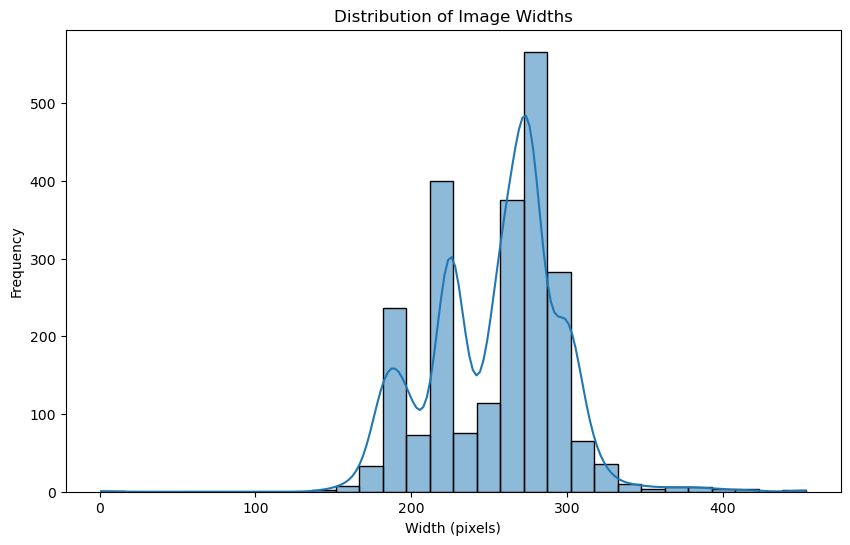

In [11]:
# Histogram of image sizes
# Histogram of image sizes
# Histogram of image sizes

image_sizes = []
for dirpath, dirnames, filenames in os.walk(TRAIN_DATA_DIR):
    for filename in filenames:
        if filename.endswith('.jpeg'):
            img_path = os.path.join(dirpath, filename)
            img = PIL.Image.open(img_path)
            image_sizes.append(img.size)  # (width, height)
            print(img.size)
image_sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
plt.figure(figsize=(10, 6))
sns.histplot(image_sizes_df['Width'], bins=30, kde=True)
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.show()



In [12]:
# save image paths of images wiht size less than 124x124
small_image_paths = []
for dirpath, dirnames, filenames in os.walk(TRAIN_DATA_DIR):
    for filename in filenames:
        if filename.endswith('.jpeg'):
            img_path = os.path.join(dirpath, filename)
            img = PIL.Image.open(img_path)
            if img.size[0] < 124 or img.size[1] < 124:
                small_image_paths.append(img_path)
small_image_paths

['train/avocado/00042.jpeg',
 'train/avocado/00040.jpeg',
 'train/pinenapple/00113.jpeg',
 'train/watermelon/00113.jpeg',
 'train/banana/00136.jpeg',
 'train/orange/00122.jpeg']

In [13]:
# Remove small images but save them in removed folder
removed_dir = os.path.join("removed_small_images")
os.makedirs(removed_dir, exist_ok=True)
for img_path in small_image_paths:
    img_name = os.path.basename(img_path)
    new_path = os.path.join(removed_dir, (img_path[6:10]+img_name))
    os.rename(img_path, new_path)


Repeating for validation set

In [14]:
# save image paths of images wiht size less than 124x124
small_image_paths_valid = []
for dirpath, dirnames, filenames in os.walk(VAL_DATA_DIR):
    for filename in filenames:
        if filename.endswith('.jpeg'):
            img_path = os.path.join(dirpath, filename)
            img = PIL.Image.open(img_path)
            if img.size[0] < 124 or img.size[1] < 124:
                small_image_paths_valid.append(img_path)
small_image_paths_valid

['val/pinenapple/00035.jpeg']

In [15]:
# Remove small images but save them in removed folder
removed_dir = os.path.join("removed_small_images")
os.makedirs(removed_dir, exist_ok=True)
for img_path in small_image_paths_valid:
    img_name = os.path.basename(img_path)
    new_path = os.path.join(removed_dir, (img_path[6:10]+img_name))
    os.rename(img_path, new_path)


### Train test split

In [16]:
batch_size = 32
img_height = 124
img_width = 124

# Training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DATA_DIR,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DATA_DIR,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 2294 files belonging to 10 classes.
Found 1024 files belonging to 10 classes.


In [17]:
class_names = train_ds.class_names
print(class_names)

['apple', 'avocado', 'banana', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']


2025-10-11 11:38:28.260568: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


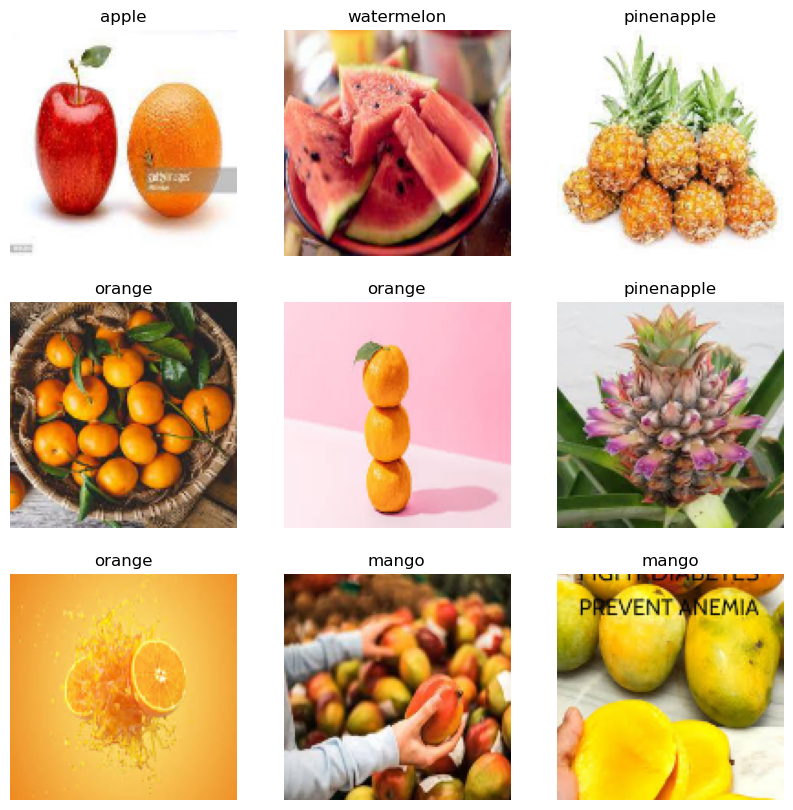

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [21]:
num_classes = 10

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Conv2D(32, 3, activation='relu'),
  #tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Conv2D(32, 3, activation='relu'),
  #tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  # tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [22]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

: 

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)


Epoch 1/30
